<a href="https://colab.research.google.com/github/dlguswn3659/class-MachineLearning/blob/master/new_assignment_11_hidden_layer_three4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import nltk
import math
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelBinarizer
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from wordcloud import WordCloud,STOPWORDS
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize,sent_tokenize
from bs4 import BeautifulSoup
import spacy
import re,string,unicodedata
from nltk.tokenize.toktok import ToktokTokenizer
from nltk.stem import LancasterStemmer,WordNetLemmatizer
from sklearn.linear_model import LogisticRegression,SGDClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from textblob import TextBlob
from textblob import Word
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score

In [50]:
import numpy as np
import re
import nltk
from sklearn.datasets import load_files
nltk.download('stopwords')
nltk.download('wordnet')
import pickle
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.model_selection import train_test_split
# from google.colab import files

# uploaded = files.upload()

# import zipfile
# import io
# zf = zipfile.ZipFile(io.BytesIO(uploaded['movie_review.zip']), "r")
# zf.extractall()

review_data = load_files(r"movie_review")
X, y = review_data.data, review_data.target

documents = []

stemmer = WordNetLemmatizer()

for sen in range(0, len(X)):
    # Remove all the special characters
    document = re.sub(r'\W', ' ', str(X[sen]))
    
    # remove all single characters
    document = re.sub(r'\s+[a-zA-Z]\s+', ' ', document)
    
    # Remove single characters from the start
    document = re.sub(r'\^[a-zA-Z]\s+', ' ', document) 
    
    # Substituting multiple spaces with single space
    document = re.sub(r'\s+', ' ', document, flags=re.I)
    
    # Removing prefixed 'b'
    document = re.sub(r'^b\s+', '', document)
    
    # Converting to Lowercase
    document = document.lower()
    
    # Lemmatization
    document = document.split()
    document = [stemmer.lemmatize(word) for word in document]
    document = ' '.join(document)
    
    documents.append(document)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [51]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = CountVectorizer(max_features=40000, min_df=5, max_df=0.7, stop_words=stopwords.words('english'))
# vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(documents).toarray()
print(X)

vector_size = 1413

###################################################

# # tfidfconverter = TfidfTransformer()
# # print(tfidfconverter)
# # X = tfidfconverter.fit_transform(X).toarray()
# # print(X)

# X_train_tmp, X_test_tmp, y_train, y_test = train_test_split(X, y, test_size=0.3, shuffle=False)

# # print(X_train.shape)

# X_pos_sum = np.zeros(12638)
# X_neg_sum = np.zeros(12638)

# X_train = np.zeros((1401, 897))
# X_test = np.zeros((601, 897))

# for i in range(0, 2002):
#   if y[i] == 0:
#     X_neg_sum = X_neg_sum + X[i]
#   else:
#     X_pos_sum = X_pos_sum + X[i]

# pos_neg_voca = 0

# for i in range(0, 12638):
#   # if abs(X_neg_sum[i] - X_pos_sum[i]) >= 30:
#   if (X_neg_sum[i]*4 <= X_pos_sum[i] and X_pos_sum[i] > 8) or (X_pos_sum[i]*4 <= X_neg_sum[i] and X_neg_sum[i] > 8):
#     for j in range(0, 1401):
#       X_train[j][pos_neg_voca] = X_train_tmp[j][i]
#     for j in range(0, 601):
#       X_test[j][pos_neg_voca] = X_test_tmp[j][i]
#     pos_neg_voca  = pos_neg_voca + 1

# # tfidfconverter = TfidfTransformer()
# # X_train = tfidfconverter.fit_transform(X_train).toarray()
# # X_test = tfidfconverter.fit_transform(X_test).toarray()

# print(X_neg_sum)
# print(X_pos_sum)
# print(pos_neg_voca)

#################################################

list_x=X.tolist()
negative=[]
positive=[]
for i in range(0,2002):
  if y[i]==0:
    negative.append(list_x[i])
  else:
    positive.append(list_x[i])
negative=np.array(negative)
positive=np.array(positive)
total_sum=X.sum(axis=0)
neg_sum=negative.sum(axis=0)
pos_sum=positive.sum(axis=0)

neg_ratio=neg_sum/total_sum
pos_ratio=pos_sum/total_sum

good=[]
for i in range(0,len(pos_sum)):
  if neg_ratio[i]>pos_ratio[i]*3 and neg_sum[i] > 7:
    # print(neg_ratio[i])
    good.append(i)
  elif pos_ratio[i]>neg_ratio[i]*3 and pos_sum[i] > 7:
    # print(pos_ratio[i])
    good.append(i)
print("good의 길이:   " , len(good))
new=np.ones((1,2002), dtype=float)
for i in range(0,len(good)):
  temp=X[:,good[i]]
  temp=temp[np.newaxis]
  new=np.vstack((new,temp))
new=np.transpose(new)
new=new[:,1:]
# vectorizer = CountVectorizer(max_features=2, min_df=0, stop_words=stopwords.words('english'))
# Xp = vectorizer.fit_transform(pluss).toarray()

# tfidfconverter = TfidfTransformer()
# X = tfidfconverter.fit_transform(X).toarray()
X_train, X_test, y_train, y_test = train_test_split(new, y, test_size=0.3, shuffle=False)

print(X_train)
print(X_test)

print(X_train[0])

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
good의 길이:    1412
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
[0. 0. 0. ... 0. 0. 0.]


In [0]:
#first hidden layer로 가기 위한 초기 fully connected u 생성
w_tmp = np.ones(shape=(1401, 100, vector_size))
v_tmp = np.ones(shape=(1401, 12, 100))
u_tmp = np.ones(shape=(1401, 1, 12))

matrix_u = np.zeros((100, vector_size))  #100줄
matrix_u[0][0] = 1               #y레이어의 bias를 위한 값 1

for i in range(1, 100):
  for j in range(0, vector_size):
    matrix_u[i][j] = np.random.normal()


# matrix_u[196][0] = 0            #줄, 칸
##############################################
matrix_v = np.zeros((12, 100))  #12줄
matrix_v[0][0] = 1               #y레이어의 bias를 위한 값 1

for i in range(1, 12):
  for j in range(0, 100):
    matrix_v[i][j] = np.random.normal()


# matrix_v[196][0] = 0            #줄, 칸
##############################################
matrix_w = np.zeros((1, 12))  #10줄
# matrix_w[0][0] = 1               #y레이어의 bias를 위한 값 1

for i in range(0, 1):
  for j in range(0, 12):
    matrix_w[i][j] = np.random.normal()

w_tmp = matrix_w
v_tmp = matrix_v
u_tmp = matrix_u

# matrix_w[196][0] = 0            #줄, 칸

# print(matrix)

In [0]:
import operator

y_ = np.ones((100, 1))

x_list = np.ones(shape=(1401, vector_size, 1))

y__list = np.ones(shape=(1401, 100, 1))
z__list = np.ones(shape=(1401, 12, 1))
h__list = np.ones(shape=(1401, 1, 1))

y_list = np.ones(shape=(1401, 100, 1))
z_list = np.ones(shape=(1401, 12, 1))
h_list = np.ones(shape=(1401, 1, 1))
l_list = np.zeros(shape=(1401, 1, 1))

y_list_tmp = np.ones(shape=(1401, 100, 1))
z_list_tmp = np.ones(shape=(1401, 12, 1))
h_list_tmp = np.ones(shape=(1401, 1, 1))
y__list_tmp = np.ones(shape=(1401, 100, 1))
z__list_tmp = np.ones(shape=(1401, 12, 1))
h__list_tmp = np.ones(shape=(1401, 1, 1))


#training set 1401개에 대해서
for i in range(0, 1401):
  bias   = [1]       #bias 1
  im_vector = np.concatenate((bias, X_train[i]), axis = None)

  im_matrix   = im_vector.reshape((vector_size, 1))
  
  x_list[i] = im_matrix

  y_ = np.dot(matrix_u, im_matrix)  #x와 가중치 u를 곱해서 y_를 만듦
  y__list[i] = y_
  
  y_vector = np.ones((100,1)) #bias
  for j in range (1, 100):
    y_vector[j][0] = 1 / (1 + math.exp(-y_[j][0]))
    # sigmoid(y_[j][0])  #sigmoid 함수를 적용해서 y_에서 y를 만듦

  y   = y_vector.reshape((100, 1))
  y_list[i] = y

  z_  = np.dot(matrix_v, y)  #y와 가중치 v를 곱해서 z_를 만듦
  z__list[i] = z_
  z_vector = np.ones((12,1)) #bias
  for j in range (1, 12):
    z_vector[j][0] = 1 / (1 + math.exp(-z_[j][0]))  #sigmoid 함수를 적용해서 y_에서 y를 만듦

  z   = z_vector.reshape((12, 1))
  z_list[i] = z
  
  # print(z)

  h_  = np.dot(matrix_w, z)  #z와 가중치 w를 곱해서 h_를 만듦
  h__list[i] = h_
  
  h_vector = np.ones((1,1)) #bias
  for j in range (0, 1):
    h_vector[j][0] = 1 / (1 + math.exp(-h_[j][0]))  #sigmoid 함수를 적용해서 h_에서 h를 만듦

  h   = h_vector.reshape((1, 1))
  
  h_list[i] = h

  tmp_label = 0
  # print(h)

  if h >= 0.5:
    tmp_label = 1

  l_list[i][0] = tmp_label

  y_list_tmp[i] = y_list[i]
  z_list_tmp[i] = z_list[i]
  h_list_tmp[i] = h_list[i]
  y__list_tmp[i] = y__list[i]
  z__list_tmp[i] = z__list[i]
  h__list_tmp[i] = h__list[i]

# print(l_list)

In [0]:
import operator

y_2 = np.ones((100, 1))

x_list2 = np.ones(shape=(601, vector_size, 1))

y__list2 = np.ones(shape=(601, 100, 1))
z__list2 = np.ones(shape=(601, 12, 1))
h__list2 = np.ones(shape=(601, 1, 1))

y_list2 = np.ones(shape=(601, 100, 1))
z_list2 = np.ones(shape=(601, 12, 1))
h_list2 = np.ones(shape=(601, 1, 1))
l_list2 = np.zeros(shape=(601, 1, 1))

y_list_tmp2 = np.ones(shape=(601, 100, 1))
z_list_tmp2 = np.ones(shape=(601, 12, 1))
h_list_tmp2 = np.ones(shape=(601, 1, 1))
y__list_tmp2 = np.ones(shape=(601, 100, 1))
z__list_tmp2 = np.ones(shape=(601, 12, 1))
h__list_tmp2 = np.ones(shape=(601, 1, 1))


#training set 1000개에 대해서
for i in range(0, 601):
  bias2   = [1]       #bias 1
  im_vector2 = np.concatenate((bias2, X_test[i]), axis = None)

  # print(type(list_image[: , i]))
  # print(list_image[:, i])
  # print(im_vector)
  im_matrix2   = im_vector2.reshape((vector_size, 1))
  
  x_list2[i] = im_matrix2

  y_2 = np.dot(matrix_u, im_matrix)  #x와 가중치 u를 곱해서 y_를 만듦
  y__list2[i] = y_2
  
  y_vector2 = np.ones((100,1)) #bias
  for j in range (1, 100):
    y_vector2[j][0] = 1 / (1 + math.exp(-y_2[j][0]))
    # sigmoid(y_[j][0])  #sigmoid 함수를 적용해서 y_에서 y를 만듦

  y2   = y_vector2.reshape((100, 1))
  y_list2[i] = y2

  z_2  = np.dot(matrix_v, y2)  #y와 가중치 v를 곱해서 z_를 만듦
  z__list2[i] = z_2
  z_vector2 = np.ones((12,1)) #bias
  for j in range (1, 12):
    z_vector2[j][0] = 1 / (1 + math.exp(-z_2[j][0]))  #sigmoid 함수를 적용해서 y_에서 y를 만듦

  z2   = z_vector2.reshape((12, 1))
  z_list2[i] = z2
  
  # print(z)

  h_2  = np.dot(matrix_w, z2)  #z와 가중치 w를 곱해서 h_를 만듦
  h__list2[i] = h_2
  
  h_vector2 = np.ones((1,1)) #bias
  for j in range (0, 1):
    h_vector2[j][0] = 1 / (1 + math.exp(-h_2[j][0]))  #sigmoid 함수를 적용해서 h_에서 h를 만듦

  h2   = h_vector2.reshape((1, 1))
  
  h_list2[i] = h2

  tmp_label = 0

  if h2 >= 0.5:
    tmp_label = 1

  l_list2[i][0] = tmp_label

  y_list_tmp2[i] = y_list2[i]
  z_list_tmp2[i] = z_list2[i]
  h_list_tmp2[i] = h_list2[i]
  y__list_tmp2[i] = y__list2[i]
  z__list_tmp2[i] = z__list2[i]
  h__list_tmp2[i] = h__list2[i]

# print(l_list)

In [55]:
#이제 여기에다가

#iteration에 따라
#cost function 값을 배열에 저장하고
#세타값을 업데이트 시키고(위의 세개 함수 호출)
#업데이트 시킨값을 다시 cost함수에 넣고
#업데이트 시키고
#이것을 반복하는 함수를 짠다.

#아직 해야하는 것 : h값에 따라 가장 큰값의 index로 L값정하는거 위에 추가해야함.

iteration = 10000
l_r = 0.2
lambda_ = 10


#####################################

cost_history = np.zeros(iteration)    #about train
cost_history2 = np.zeros(iteration)   #about test

label_group = np.zeros(shape = (1401, 1))
label_group2 = np.zeros(shape = (601, 1))

accuracy_history = np.zeros(iteration)
accuracy_history2 = np.zeros(iteration)

for i in range(0, 1401):
  label_group[i][0] = l_list[i][0]

for i in range(0, 601):
  label_group2[i][0] = l_list2[i][0]

#############################################


for t in range(0, iteration):
  number_of_correct = 0
  number_of_correct2 = 0
  
  print(t, end=' ')

  parameter_sum = 0

  for q in range(0, vector_size):
    for w in range(1, 100):
      parameter_sum = parameter_sum + matrix_u[w][q]**2

  for q in range(0, 100):
    for w in range(1, 12):
      parameter_sum = parameter_sum + matrix_u[w][q]**2

  for q in range(0, 12):
    for w in range(0, 1):
      parameter_sum = parameter_sum + matrix_u[w][q]**2

  result = 0.0
  for i in range(0, 1401):
    for k in range(0, 1):
      # if h_list_tmp[i][k][0] <= 0:
      # print(h_list_tmp[i][k][0])
      result = result + ((-1)*label_group[i][k]*math.log(h_list[i][k][0]) - (1-label_group[i][k])*math.log(1-h_list[i][k][0])) + ((lambda_)/(2 * 142512)) * parameter_sum
  result = result / 1401
  cost_history[t] = result



##gradient descent
  result_w = 0
  result_v = 0
  result_u = 0

  matrix_w_lol = matrix_w[:,1:12]
  matrix_v_lol = matrix_v[1:12,1:100]

  y_list_tmp_lol = y_list_tmp[:,1:100,:]

  z_list_lol = z_list[:,1:12,:]
  y_list_lol = y_list[:,1:100,:]
  x_list_lol = x_list[:,1:vector_size,:]

  for i in range(0, 1401):
    small_delta_2 = np.zeros(shape = (1, 1))
    for j in range(0, 1):
      small_delta_2[j][0] = h_list[i][j] - label_group[i][j]
    # print(h_list[i])
    # print(label_group[i])
    # small_delta_2 = h_list[i] - label_group[i] #여기 label_group 다시 봐야함.



    small_delta_1 = np.dot(np.transpose(matrix_w_lol), small_delta_2)
    small_delta_0 = np.dot(np.transpose(matrix_v_lol), small_delta_1)*(y_list_tmp_lol[i]*(1 - y_list_tmp_lol[i]))

    # print(small_delta_2)
    result_w = result_w + np.dot(small_delta_2, np.transpose(z_list_lol[i]))
    result_v = result_v + np.dot(small_delta_1, np.transpose(y_list_lol[i]))
    result_u = result_u + np.dot(small_delta_0, np.transpose(x_list_lol[i]))

    # print(result_u)

  matrix_w[:, 1:12] = matrix_w[:, 1:12] - (result_w / 1401 *l_r)
  matrix_v[1:12, 1:100] = matrix_v[1:12, 1:100] - (result_v / 1401 *l_r)
  matrix_u[1:100, 1:vector_size] = matrix_u[1:100, 1:vector_size] - (result_u / 1401 *l_r)

  matrix_u[0] = 0
  matrix_u[0][0] = 1

  matrix_v[0] = 0
  matrix_v[0][0] = 1


####################################################################

  for k in range(0, 1401):
    bias   = [1]       #bias 1
    im_vector = np.concatenate((bias, X_train[k]), axis = None)

    im_matrix   = im_vector.reshape((vector_size, 1))

    y_ = np.dot(matrix_u, im_matrix)  #x와 가중치 u를 곱해서 y_를 만듦
    y__list[k] = y_
    
    y_vector = np.ones((100,1)) #bias
    for j in range (1, 100):
      y_vector[j][0] = 1 / (1 + math.exp(-y_[j][0]))  #sigmoid 함수를 적용해서 y_에서 y를 만듦
    
    # print(y_vector) #시그모이드 값 확인
    y   = y_vector.reshape((100, 1))
    y_list[k] = y

    z_  = np.dot(matrix_v, y)  #y와 가중치 v를 곱해서 z_를 만듦
    z__list[k] = z_
    z_vector = np.ones((12,1)) #bias
    for j in range (1, 12):
      z_vector[j][0] = 1 / (1 + math.exp(-z_[j][0]))  #sigmoid 함수를 적용해서 y_에서 y를 만듦

    z   = z_vector.reshape((12, 1))
    z_list[k] = z
    
    # print(z)

    h_  = np.dot(matrix_w, z)  #z와 가중치 w를 곱해서 h_를 만듦
    h__list[k] = h_
    
    h_vector = np.ones((1,1)) #bias
    for j in range (0, 1):
      h_vector[j][0] = 1 / (1 + math.exp(-h_[j][0]))  #sigmoid 함수를 적용해서 h_에서 h를 만듦

    h   = h_vector.reshape((1, 1))

    h_list[k] = h

    tmp_label = 0

    if h >= 0.5:
      # print(h)
      tmp_label = 1

    l_list[k][0] = tmp_label

    y_list_tmp[k] = y_list[k]
    z_list_tmp[k] = z_list[k]
    h_list_tmp[k] = h_list[k]
    y__list_tmp[k] = y__list[k]
    z__list_tmp[k] = z__list[k]
    h__list_tmp[k] = h__list[k]

    if l_list[k][0] == y_train[k]:
      number_of_correct = number_of_correct + 1

  accuracy_history[t] = number_of_correct / 1401 * 100
  print(accuracy_history[t], end=' ')

############################
  #test data!
  
  # print(t, end=' ')

  result2 = 0.0
  for i in range(0, 601):
    for k in range(0, 1):
      result2 = result2 + ((-1)*label_group2[i][k]*math.log(h_list2[i][k][0]) - (1-label_group2[i][k])*math.log(1-h_list2[i][k][0])) + ((lambda_)/(2 * 142512)) * parameter_sum
  result2 = result2 / 601
  cost_history2[t] = result2


  for k in range(0, 601):
  # print(i)
    bias2   = [1]       #bias 1
    im_vector2 = np.concatenate((bias2, X_test[k]), axis = None)

    im_matrix2   = im_vector2.reshape((vector_size, 1))

    y_2 = np.dot(matrix_u, im_matrix2)  #x와 가중치 u를 곱해서 y_를 만듦
    y__list2[k] = y_2
    
    y_vector2 = np.ones((100,1)) #bias
    for j in range (1, 100):
      y_vector2[j][0] = 1 / (1 + math.exp(-y_2[j][0]))  #sigmoid 함수를 적용해서 y_에서 y를 만듦
    
    # print(y_vector) #시그모이드 값 확인
    y2   = y_vector2.reshape((100, 1))
    y_list2[k] = y2

    z_2  = np.dot(matrix_v, y2)  #y와 가중치 v를 곱해서 z_를 만듦
    z__list2[k] = z_2
    z_vector2 = np.ones((12,1)) #bias
    for j in range (1, 12):
      z_vector2[j][0] = 1 / (1 + math.exp(-z_2[j][0]))  #sigmoid 함수를 적용해서 y_에서 y를 만듦

    z2   = z_vector2.reshape((12, 1))
    z_list2[k] = z2
    
    # print(z)

    h_2  = np.dot(matrix_w, z2)  #z와 가중치 w를 곱해서 h_를 만듦
    h__list2[k] = h_2
    
    h_vector2 = np.ones((1,1)) #bias
    for j in range (0, 1):
      h_vector2[j][0] = 1 / (1 + math.exp(-h_2[j][0]))  #sigmoid 함수를 적용해서 h_에서 h를 만듦

    h2   = h_vector2.reshape((1, 1))

    h_list2[k] = h2

    tmp_label2 = 0

    if h2 >= 0.5:
      # print(h)
      tmp_label2 = 1

    l_list2[k][0] = tmp_label2

    y_list_tmp2[k] = y_list2[k]
    z_list_tmp2[k] = z_list2[k]
    h_list_tmp2[k] = h_list2[k]
    y__list_tmp2[k] = y__list2[k]
    z__list_tmp2[k] = z__list2[k]
    h__list_tmp2[k] = h__list2[k]

    if l_list2[k][0] == y_test[k]:
      number_of_correct2 = number_of_correct2 + 1

  accuracy_history2[t] = number_of_correct2 / 601 * 100
  print(accuracy_history2[t])

  t = t + 1

스트리밍 출력 내용이 길어서 마지막 5000줄이 삭제되었습니다.
4995 48.965024982155605 45.75707154742096
4996 48.965024982155605 45.75707154742096
4997 48.965024982155605 45.75707154742096
4998 48.965024982155605 45.75707154742096
4999 48.965024982155605 45.75707154742096
5000 48.965024982155605 45.75707154742096
5001 48.965024982155605 45.75707154742096
5002 48.965024982155605 45.75707154742096
5003 48.965024982155605 45.75707154742096
5004 48.965024982155605 45.75707154742096
5005 48.965024982155605 45.75707154742096
5006 48.965024982155605 45.75707154742096
5007 48.965024982155605 45.75707154742096
5008 48.965024982155605 45.75707154742096
5009 48.965024982155605 45.75707154742096
5010 48.965024982155605 45.75707154742096
5011 48.965024982155605 45.75707154742096
5012 48.965024982155605 45.75707154742096
5013 48.965024982155605 45.75707154742096
5014 48.965024982155605 45.75707154742096
5015 48.965024982155605 45.75707154742096
5016 48.965024982155605 45.75707154742096
5017 48.965024982155605 45.7570715474209

# **Machine Learning Assignment09** #

---



Name : 이현주

Student # : 20184060

# **1. Plot the loss curve [10pt]**

- plot the training loss at every iteration of gradient descent using the training data in blue color (the first 6,000 images) [5pt]
- plot the testing loss at every iteration of gradient descent using the testing data in red color (the rest 4,000 images) [5pt]
- the both curves should be presented in one figure

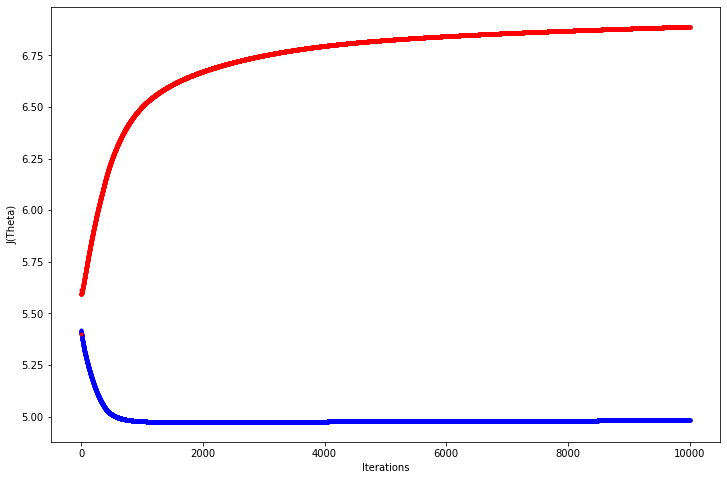

In [56]:
#그 코드를 바탕으로 training loss plotting 하기.
real_iter = iteration

fig,ax = plt.subplots(figsize=(12,8))

cost_tmp = np.zeros(real_iter)

for i in range(0, real_iter):
  cost_tmp[i] = cost_history[i]


# print(cost_history[1])

ax.set_ylabel('J(Theta)')
ax.set_xlabel('Iterations')
_=ax.plot(range(real_iter),cost_tmp,'b.', color = 'blue')
_=ax.plot(range(real_iter),cost_history2,'b.', color = 'red')

# **2. Plot the accuracy curve [10pt]**

- plot the training accuracy (%) at every iteration of gradient descent using the training data in blue color (the first 6,000 images) [5pt]
- plot the testing accuracy (%) at every iteration of gradient descent using the testing data in red color (the rest 4,000 images) [5pt]
- the both curves should be presented in one figure

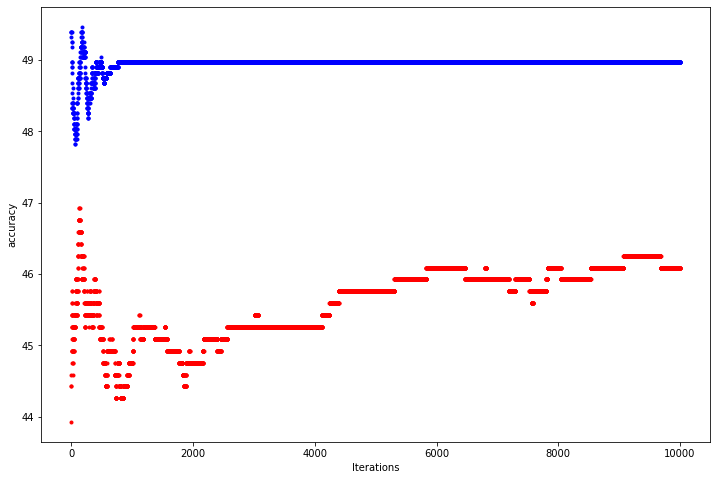

In [57]:
#그 코드를 바탕으로 training loss plotting 하기.
fig,ax = plt.subplots(figsize=(12,8))

# print(cost_history[1])

ax.set_ylabel('accuracy')
ax.set_xlabel('Iterations')
_=ax.plot(range(iteration),accuracy_history,'b.', color = 'blue')
_=ax.plot(range(iteration),accuracy_history2,'b.', color = 'red')
# print(ac_tmp)

# **3. Plot the quantitative results [6pt]**

Training results

- print the confusion matrix using the function confusion_matrix based on the training data [1pt]
- print the classification report using the function classification_report based on the training data [1pt]
- print the accuracy score using the function accuracy_score based on the training data [1pt]


Testing results

- print the confusion matrix using the function confusion_matrix based on the testing data [1pt]
- print the classification report using the function classification_report based on the testing data [1pt]
- print the accuracy score using the function accuracy_score based on the testing data [1pt]

In [58]:
#Codes for Evaluation
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

l_list_tmp = l_list.reshape((1401))
l_list2_tmp = l_list2.reshape((601))

print(confusion_matrix(y_train,l_list_tmp))
print(classification_report(y_train,l_list_tmp))
print(accuracy_score(y_train, l_list_tmp))

print(confusion_matrix(y_test,l_list2_tmp))
print(classification_report(y_test,l_list2_tmp))
print(accuracy_score(y_test, l_list2_tmp))

[[381 318]
 [397 305]]
              precision    recall  f1-score   support

           0       0.49      0.55      0.52       699
           1       0.49      0.43      0.46       702

    accuracy                           0.49      1401
   macro avg       0.49      0.49      0.49      1401
weighted avg       0.49      0.49      0.49      1401

0.489650249821556
[[220  82]
 [242  57]]
              precision    recall  f1-score   support

           0       0.48      0.73      0.58       302
           1       0.41      0.19      0.26       299

    accuracy                           0.46       601
   macro avg       0.44      0.46      0.42       601
weighted avg       0.44      0.46      0.42       601

0.46089850249584025


In [59]:
class_1 = 0

for i in range(0, 601):
  if l_list2_tmp[i] == 1:
    class_1 = class_1 + 1

print(class_1)

139
